In [9]:
from modules.backtest.strategy import TopKStrategy
from modules.backtest.backtrader import BackTrader
from modules.factor_benchmark.utils import calc_rank_ic, calc_pearson_corr, make_summary
from modules.visualization import generate_visualization, generate_heatmap
from modules.utils import load_factors

# 加载因子

在使用 factor.py 计算因子之后，我们可以使用 load_factors 加载我们用于研究的数据。

In [10]:
factors, returns, mkt_return = load_factors()

Data variables:
    PAST_RETURN_1           (stk_id, date) float64 nan nan ... 0.001235 0.002483
    PAST_RETURN_2           (stk_id, date) float64 nan nan nan ... 0.0 0.003718
    PAST_RETURN_3           (stk_id, date) float64 nan nan ... 0.001235 0.002483
    PAST_RETURN_5           (stk_id, date) float64 nan nan ... -0.008636
    PAST_RETURN_10          (stk_id, date) float64 nan nan ... -0.0833 -0.07966
    PAST_RETURN_15          (stk_id, date) float64 nan nan ... -0.09914 -0.08081
    PAST_RETURN_VOL_CORR5   (stk_id, date) float64 nan nan ... -0.947 -0.9542
    PAST_RETURN_VOL_CORR10  (stk_id, date) float64 nan nan nan ... 0.2282 0.6005
    PAST_RETURN_VOL_CORR15  (stk_id, date) float64 nan nan nan ... 0.2808 0.2388
    PAST_RETURN_VOL_CORR20  (stk_id, date) float64 nan nan nan ... 0.5257 0.6153


### 因子相关性查看
这里，我们可以使用 generate_heatmap 函数来查看因子之间的相关性热力图。

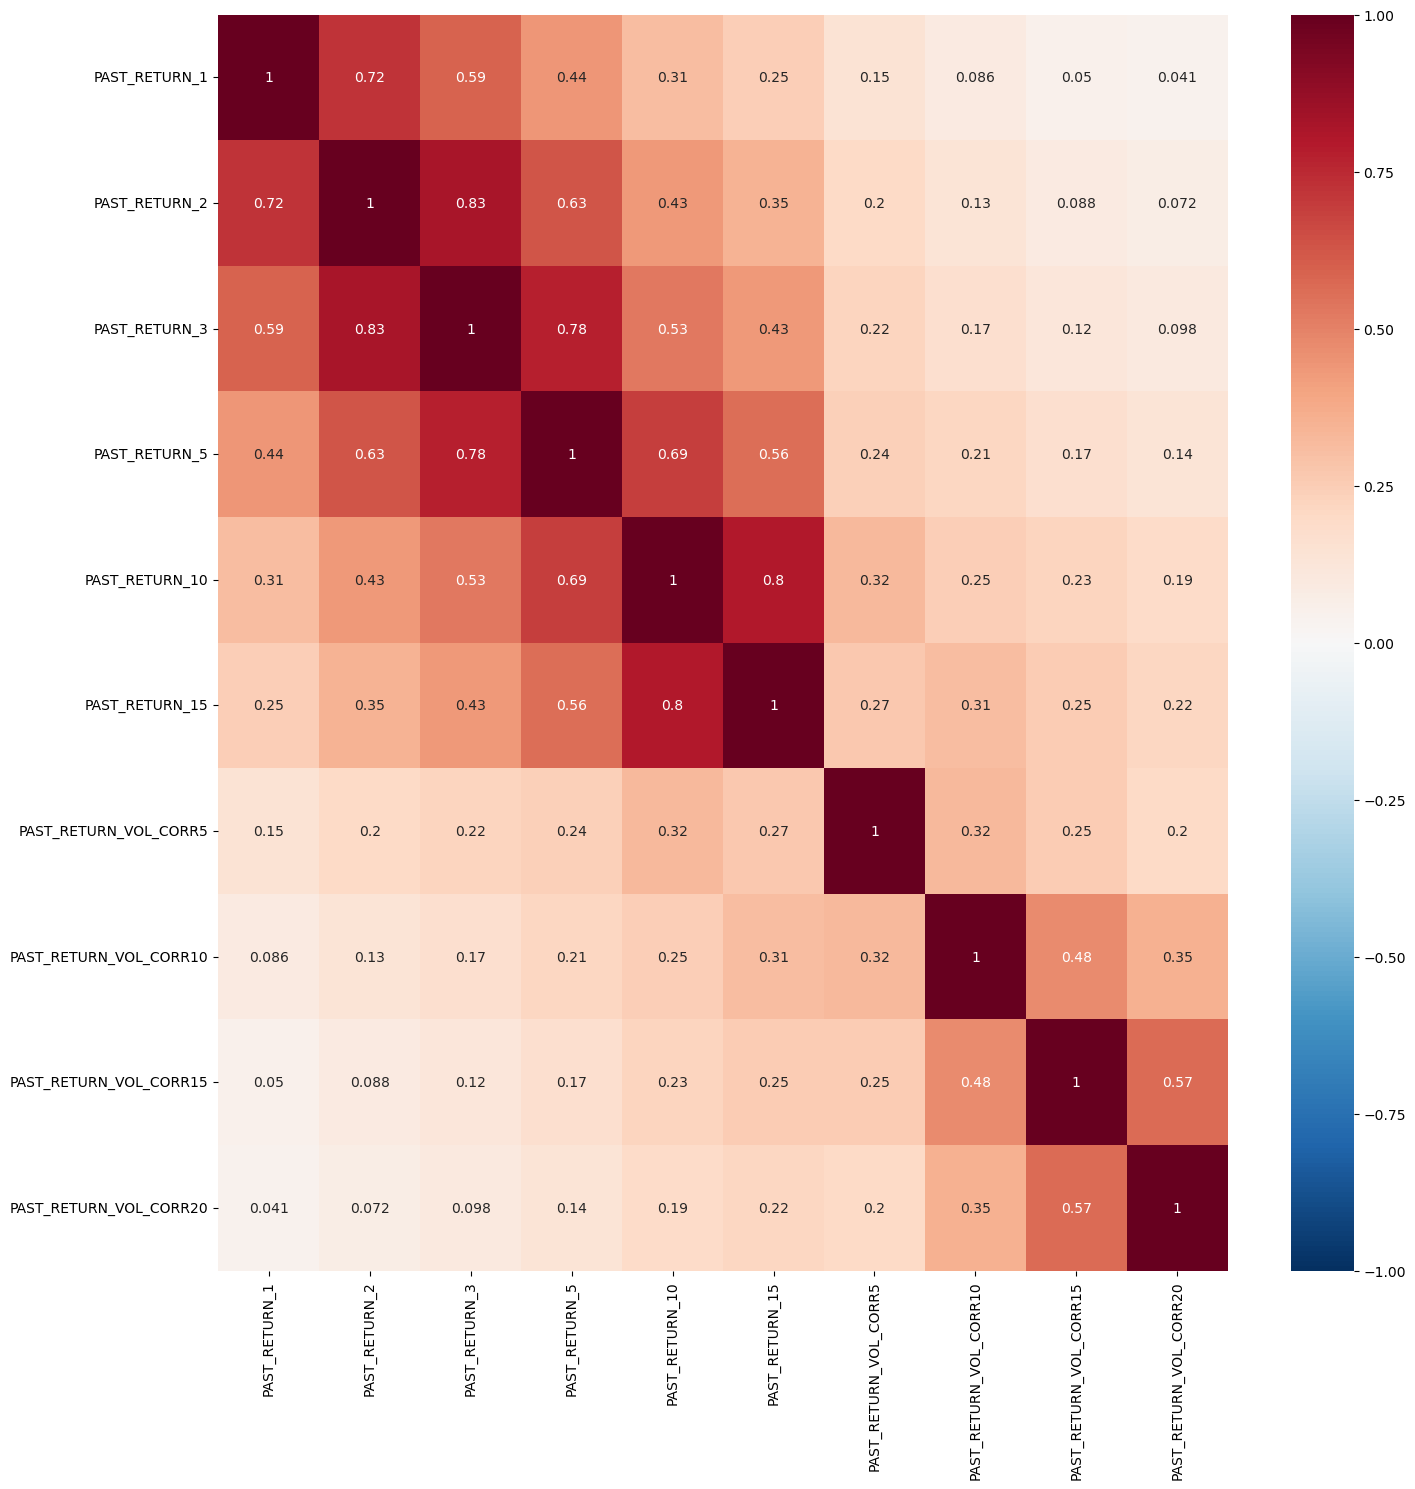

In [11]:
generate_heatmap(factors)

# 选择因子

从因子库中选择因子需要进行回测的因子，比如我们选取过去一日的回报率总额作为因子。


In [12]:
signals = -factors['PAST_RETURN_10']

# 因子回测

使用回测模块进行因子回测，回测时我们需要指明回测的策略和手续费，并初始化两个回测模块。
- TopKStrategy：选取因子值最大的前 K 个股票作为买入股票；暂时不考虑做空的情况。
- BackTrader: 回测模块，用于回测因子；接受给定的策略和手续费。

之后用 BackTrader.backtest 接口进行回测，返回回测结果。

In [13]:
strategy = TopKStrategy(k=5)
backtrader_nofee = BackTrader(strategy, 0)
backtrader = BackTrader(strategy, 0.0006)

portfolio_return_nofee = backtrader_nofee.backtest(signals, returns)
portfolio_return = backtrader.backtest(signals, returns)

# 因子评价

首先，计算每天的 rank_ic 和 pearson 相关系数，用于评价因子的预测能力。

然后用 make_summary 接口计算因子的各项指标，包括：年化收益率，年化波动率，年化夏普比率，年化超额收益（测试期），最大回撤（测试期）。

In [14]:
rank_ic = calc_rank_ic(signals, returns)
pearson_corr = calc_pearson_corr(signals, returns)

In [15]:
make_summary(portfolio_return_nofee, portfolio_return, mkt_return, rank_ic,
             pearson_corr)

,平均 Pearson 相关系数,平均 Spearman 秩相关系数
统计量 (test samples = 252),0.01105,0.029014


,年化收益率,年化波动率,年化夏普比率,测试期年化超额收益,测试期最大回撤
无手续费 (test samples = 252),-0.355026,0.277244,-1.280551,-0.151184,-0.453412
有手续费 (test samples = 252),-0.447753,0.277274,-1.614843,-0.243911,-0.496314


# 回测结果可视化
最后，用 generate_visualization 接口生成回测结果的可视化图表。

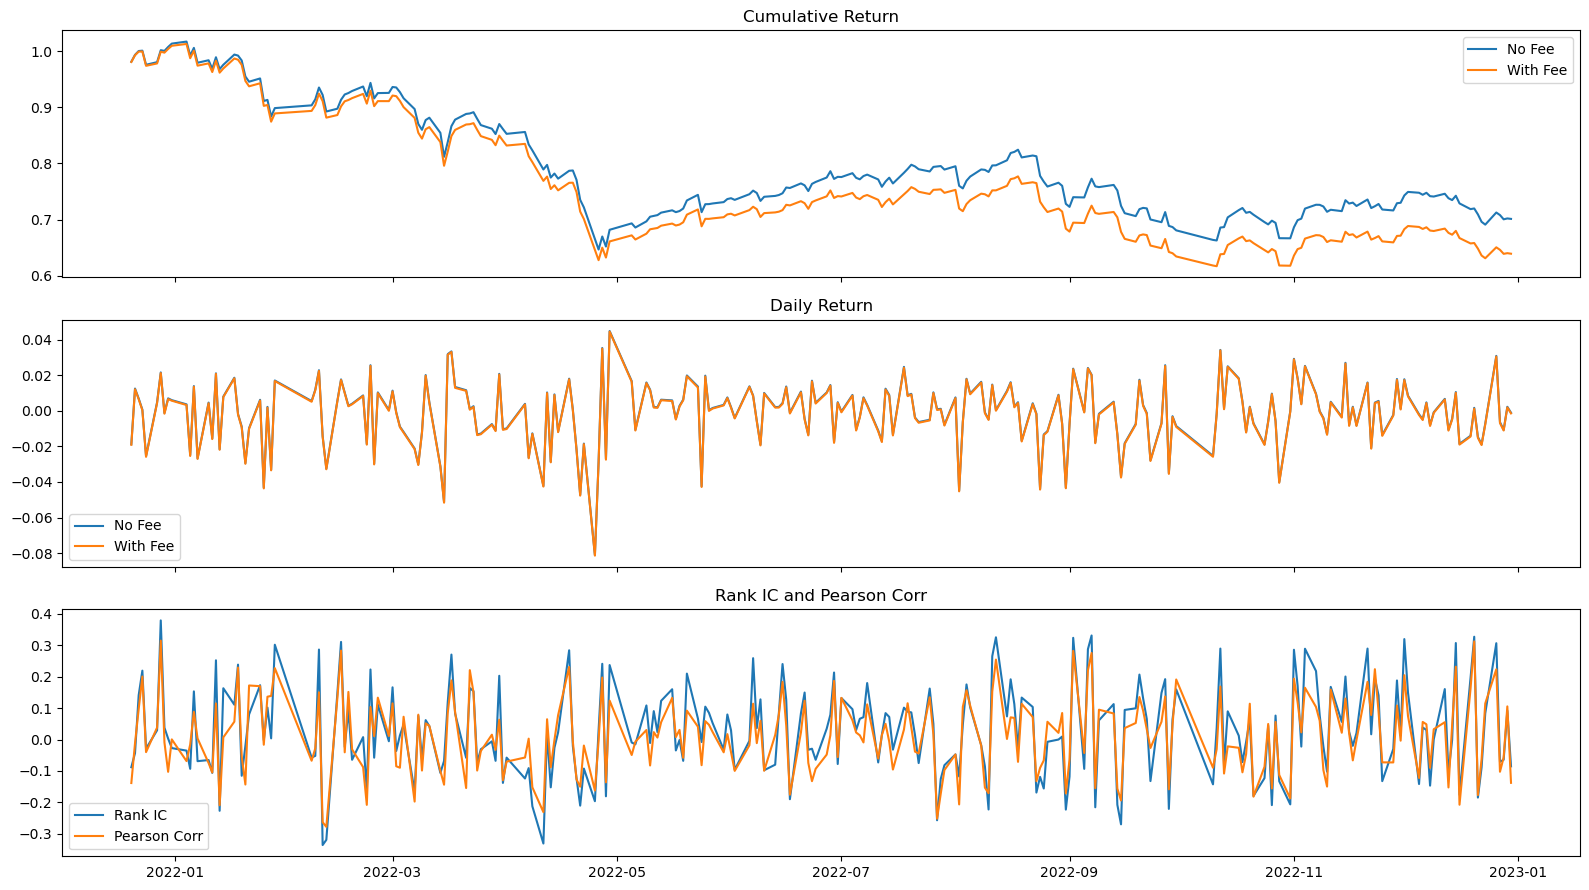

In [16]:
fig = generate_visualization(portfolio_return_nofee, portfolio_return, rank_ic,
                             pearson_corr, returns)